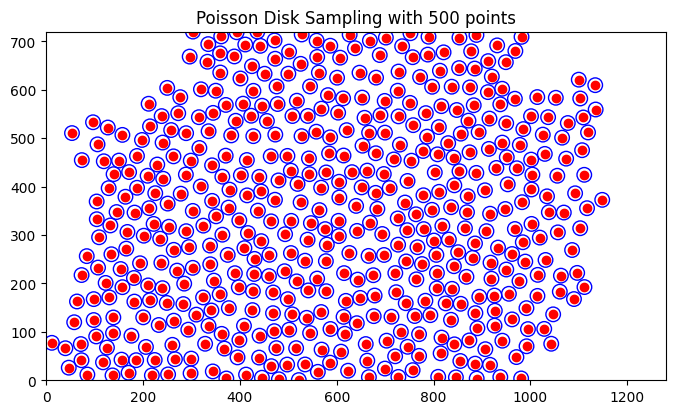

Final radius: 15.0


In [12]:
# Rewriting the required functions again before calling them for the plotting

import random
import math
from collections import deque

import matplotlib.pyplot as plt

def get_cell_coords(point, cell_size):
    return int(point[0] // cell_size), int(point[1] // cell_size)

def distance(p1, p2):
    return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

def point_valid(point, samples, grid, grid_width, grid_height, cell_size, min_distance, width, height):
    if not (0 <= point[0] <= width and 0 <= point[1] <= height):
        return False

    cell_x, cell_y = get_cell_coords(point, cell_size)
    neighbor_range = 3  # 检查周围的邻居格子
    for i in range(max(0, cell_x - neighbor_range), min(grid_width, cell_x + neighbor_range + 1)):
        for j in range(max(0, cell_y - neighbor_range), min(grid_height, cell_y + neighbor_range + 1)):
            index = grid.get((i, j))
            if index is not None:
                neighbor_point = samples[index]
                if distance(point, neighbor_point) < min_distance:
                    return False
    return True

def poisson_disk_sampling(width, height, n_samples, initial_radius, k=30):
    # 初始化参数
    min_distance = 2 * initial_radius  # 最小间距为直径
    cell_size = initial_radius / math.sqrt(2)  # 网格大小
    grid_width = int(width / cell_size) + 1
    grid_height = int(height / cell_size) + 1

    while True:
        grid = {}
        samples = []
        active_list = []

        # 随机选择初始点
        initial_point = (width / 2, height / 2)
        samples.append(initial_point)
        active_list.append(0)
        grid[get_cell_coords(initial_point, cell_size)] = 0

        while active_list and len(samples) < n_samples:
            idx = random.choice(active_list)
            point = samples[idx]
            found = False
            for _ in range(k):
                angle = random.uniform(0, 2 * math.pi)
                radius = random.uniform(min_distance, 2 * min_distance)
                new_point = (
                    point[0] + radius * math.cos(angle),
                    point[1] + radius * math.sin(angle)
                )
                if point_valid(new_point, samples, grid, grid_width, grid_height, cell_size, min_distance, width, height):
                    samples.append(new_point)
                    active_list.append(len(samples) - 1)
                    grid[get_cell_coords(new_point, cell_size)] = len(samples) - 1
                    found = True
                    if len(samples) >= n_samples:
                        break
            if not found:
                active_list.remove(idx)
        if len(samples) >= n_samples:
            break
        else:
            # 无法放置所有点，缩小半径
            initial_radius *= 0.9
            if initial_radius < 0.1:
                return None, None
            min_distance = 2 * initial_radius
            cell_size = initial_radius / math.sqrt(2)
            grid_width = int(width / cell_size) + 1
            grid_height = int(height / cell_size) + 1
    return samples, initial_radius

# Function to plot points on the graph
def plot_points(points, width, height, final_radius):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Set the plot limits to match the sampling area
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)

    # Draw the points
    for point in points:
        circle = plt.Circle(point, final_radius, color='b', fill=False)
        ax.add_patch(circle)
        ax.plot(point[0], point[1], 'ro')

    ax.set_aspect('equal')
    plt.title(f'Poisson Disk Sampling with {len(points)} points')
    plt.show()

# Parameters
width, height = 1280.0, 720.0  # 采样区域的宽和高
n_samples = 500  # 需要生成的点数
initial_radius = 15.0  # 初始半径

# Generate points using Poisson disk sampling
points, final_radius = poisson_disk_sampling(width, height, n_samples, initial_radius)

if points is None:
    print("Failed to generate points.")

# Plot the sampled points on a graph
plot_points(points, width, height, final_radius)

print(f"Final radius: {final_radius}")